In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('bmh')
from time import time

In [4]:
def rk4(x, h, f):
    # x is coordinates (as a vector)
    # h is timestep
    # f(x) is a function that returns the derivative

    # "Slopes"
    k1  = f(x)
    k2  = f(x + k1*h/2)
    k3  = f(x + k2*h/2)
    k4  = f(x + k3*h)
    # Update time and position
    x_  = x + h*(k1 + 2*k2 + 2*k3 + k4)/6
    return x_

def streamline(x, T, f, h = 0.05):
    # Return a trajectory of length T (in time units)
    # starting at position given by the vector x
    # Calculated by Runge-Kutta, with timestep h
    
    # Number of timesteps
    Nt = int(T / h)
    traj = np.zeros((2, Nt))
    traj[:,0] = x
    for i in range(Nt-1):
        traj[:,i+1] = rk4(traj[:,i], h, f)
    return traj

In [45]:
def f(x):
    # Modify A to get the different types of fixed point
    A = np.array([
        [2,  0],
        [2,  -2]
    ])
    dx = A[0,0]*x[0] + A[0,1]*x[1]
    dy = A[1,0]*x[0] + A[1,1]*x[1]
    return np.array([dx, dy])

(-2, 2)

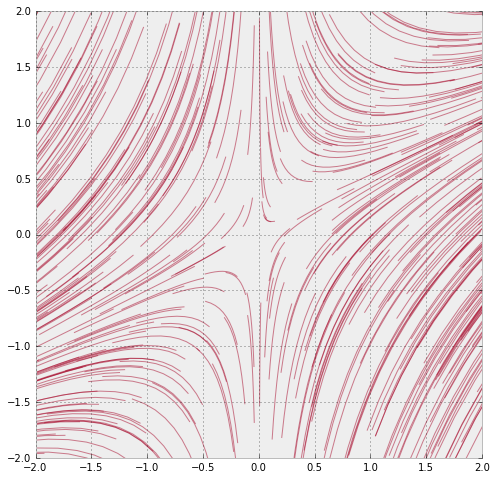

In [44]:
T = 0.5
N = 500
fig = plt.figure(figsize = (8, 8))
for i in range(N):
    x = np.random.random(size = 2) * 5 - 2.5
    line = streamline(x, T, f)
    plt.plot(line[0,:], line[1,:], lw = 1, c = '#A60628', alpha = 0.5)
    
plt.xlim(-2, 2)
plt.ylim(-2, 2)